<a href="https://colab.research.google.com/github/daol08/characterRecognition/blob/main/mathmathicSymbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, re, glob  
import cv2
import numpy as np  
from sklearn.model_selection import train_test_split 
import pandas as pd

In [2]:
data = pd.read_csv('./train_handwritten.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,141,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,114,182,182,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#numbur of character
number_chars = len(data['784'].unique())
print(number_chars)

chars_list = list(data['784'].unique())
print(chars_list)

19
[0, 12, 16, 11, 15, 1, 9, 13, 3, 5, 7, 18, 4, 14, 8, 6, 17, 10, 2]


In [6]:
x = data.drop(columns=['784']).values
y = data[['784']].values

In [7]:
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)

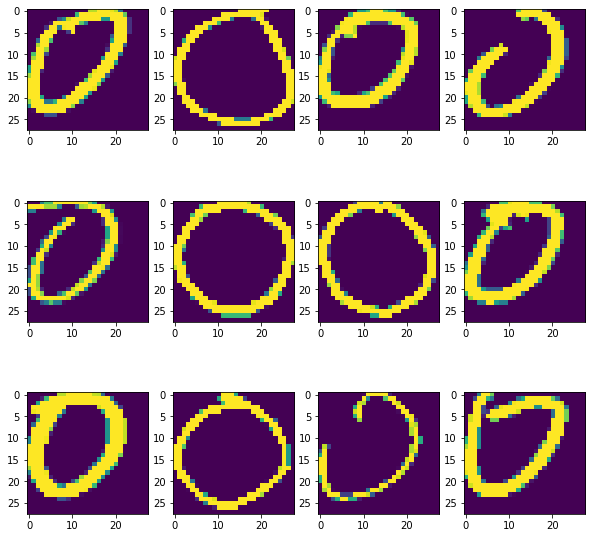

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

#reshape sample!
x_images= x.reshape(-1,28,28)
fig,axs = plt.subplots(3,4, figsize=(10,10))
for i in range(12):
  r=i//4
  c=i%4
  axs[r][c].imshow(x_images[i])
plt.show()

In [10]:
from sklearn.preprocessing import LabelBinarizer

binencoder = LabelBinarizer()
y = binencoder.fit_transform(df_y)
y_list = binencoder.classes_.tolist()
print(y_list)

#split data set
X_train, X_test, y_train, y_test = train_test_split(x_images, y, test_size=0.2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [11]:
#shape of traing, test data
print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(8056, 28, 28),(2015, 28, 28)
Y:Train, Test data shape:(8056, 19),(2015, 19)


In [12]:
X_train = (X_train/255).reshape(-1,28,28,1).astype('float32')
X_test = (X_test/255).reshape(-1,28,28,1).astype('float32')

In [14]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [15]:
#cnn model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,(4,4),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(number_chars, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [42]:
#fitting model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test),verbose=1, batch_size=64)

Epoch 1/20
126/126 [==============================] - 1s 5ms/step - loss: 0.2050 - accuracy: 0.9081 - val_loss: 0.2517 - val_accuracy: 0.8953
Epoch 2/20
126/126 [==============================] - 1s 5ms/step - loss: 0.1900 - accuracy: 0.9175 - val_loss: 0.2481 - val_accuracy: 0.8963
Epoch 3/20
126/126 [==============================] - 1s 5ms/step - loss: 0.1842 - accuracy: 0.9179 - val_loss: 0.2486 - val_accuracy: 0.9007
Epoch 4/20
126/126 [==============================] - 1s 5ms/step - loss: 0.1802 - accuracy: 0.9224 - val_loss: 0.2345 - val_accuracy: 0.9077
Epoch 5/20
126/126 [==============================] - 1s 5ms/step - loss: 0.1758 - accuracy: 0.9250 - val_loss: 0.2576 - val_accuracy: 0.9007
Epoch 6/20
126/126 [==============================] - 1s 5ms/step - loss: 0.1737 - accuracy: 0.9240 - val_loss: 0.2594 - val_accuracy: 0.9012
Epoch 7/20
126/126 [==============================] - 1s 5ms/step - loss: 0.1634 - accuracy: 0.9266 - val_loss: 0.2500 - val_accuracy: 0.9007
Epoch 

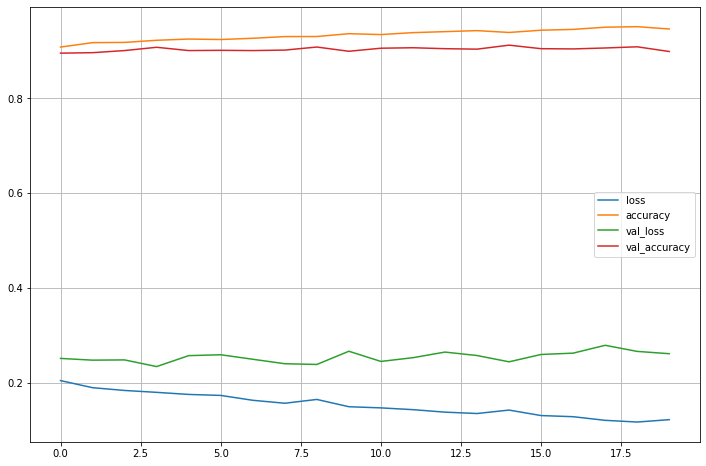

In [43]:
plot_target = ['loss' , 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(history.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [44]:
#save model
model.save("model.h5")

직접 쓴 손글씨 인식하기

In [134]:
import cv2 as cv
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

91.66666666666666


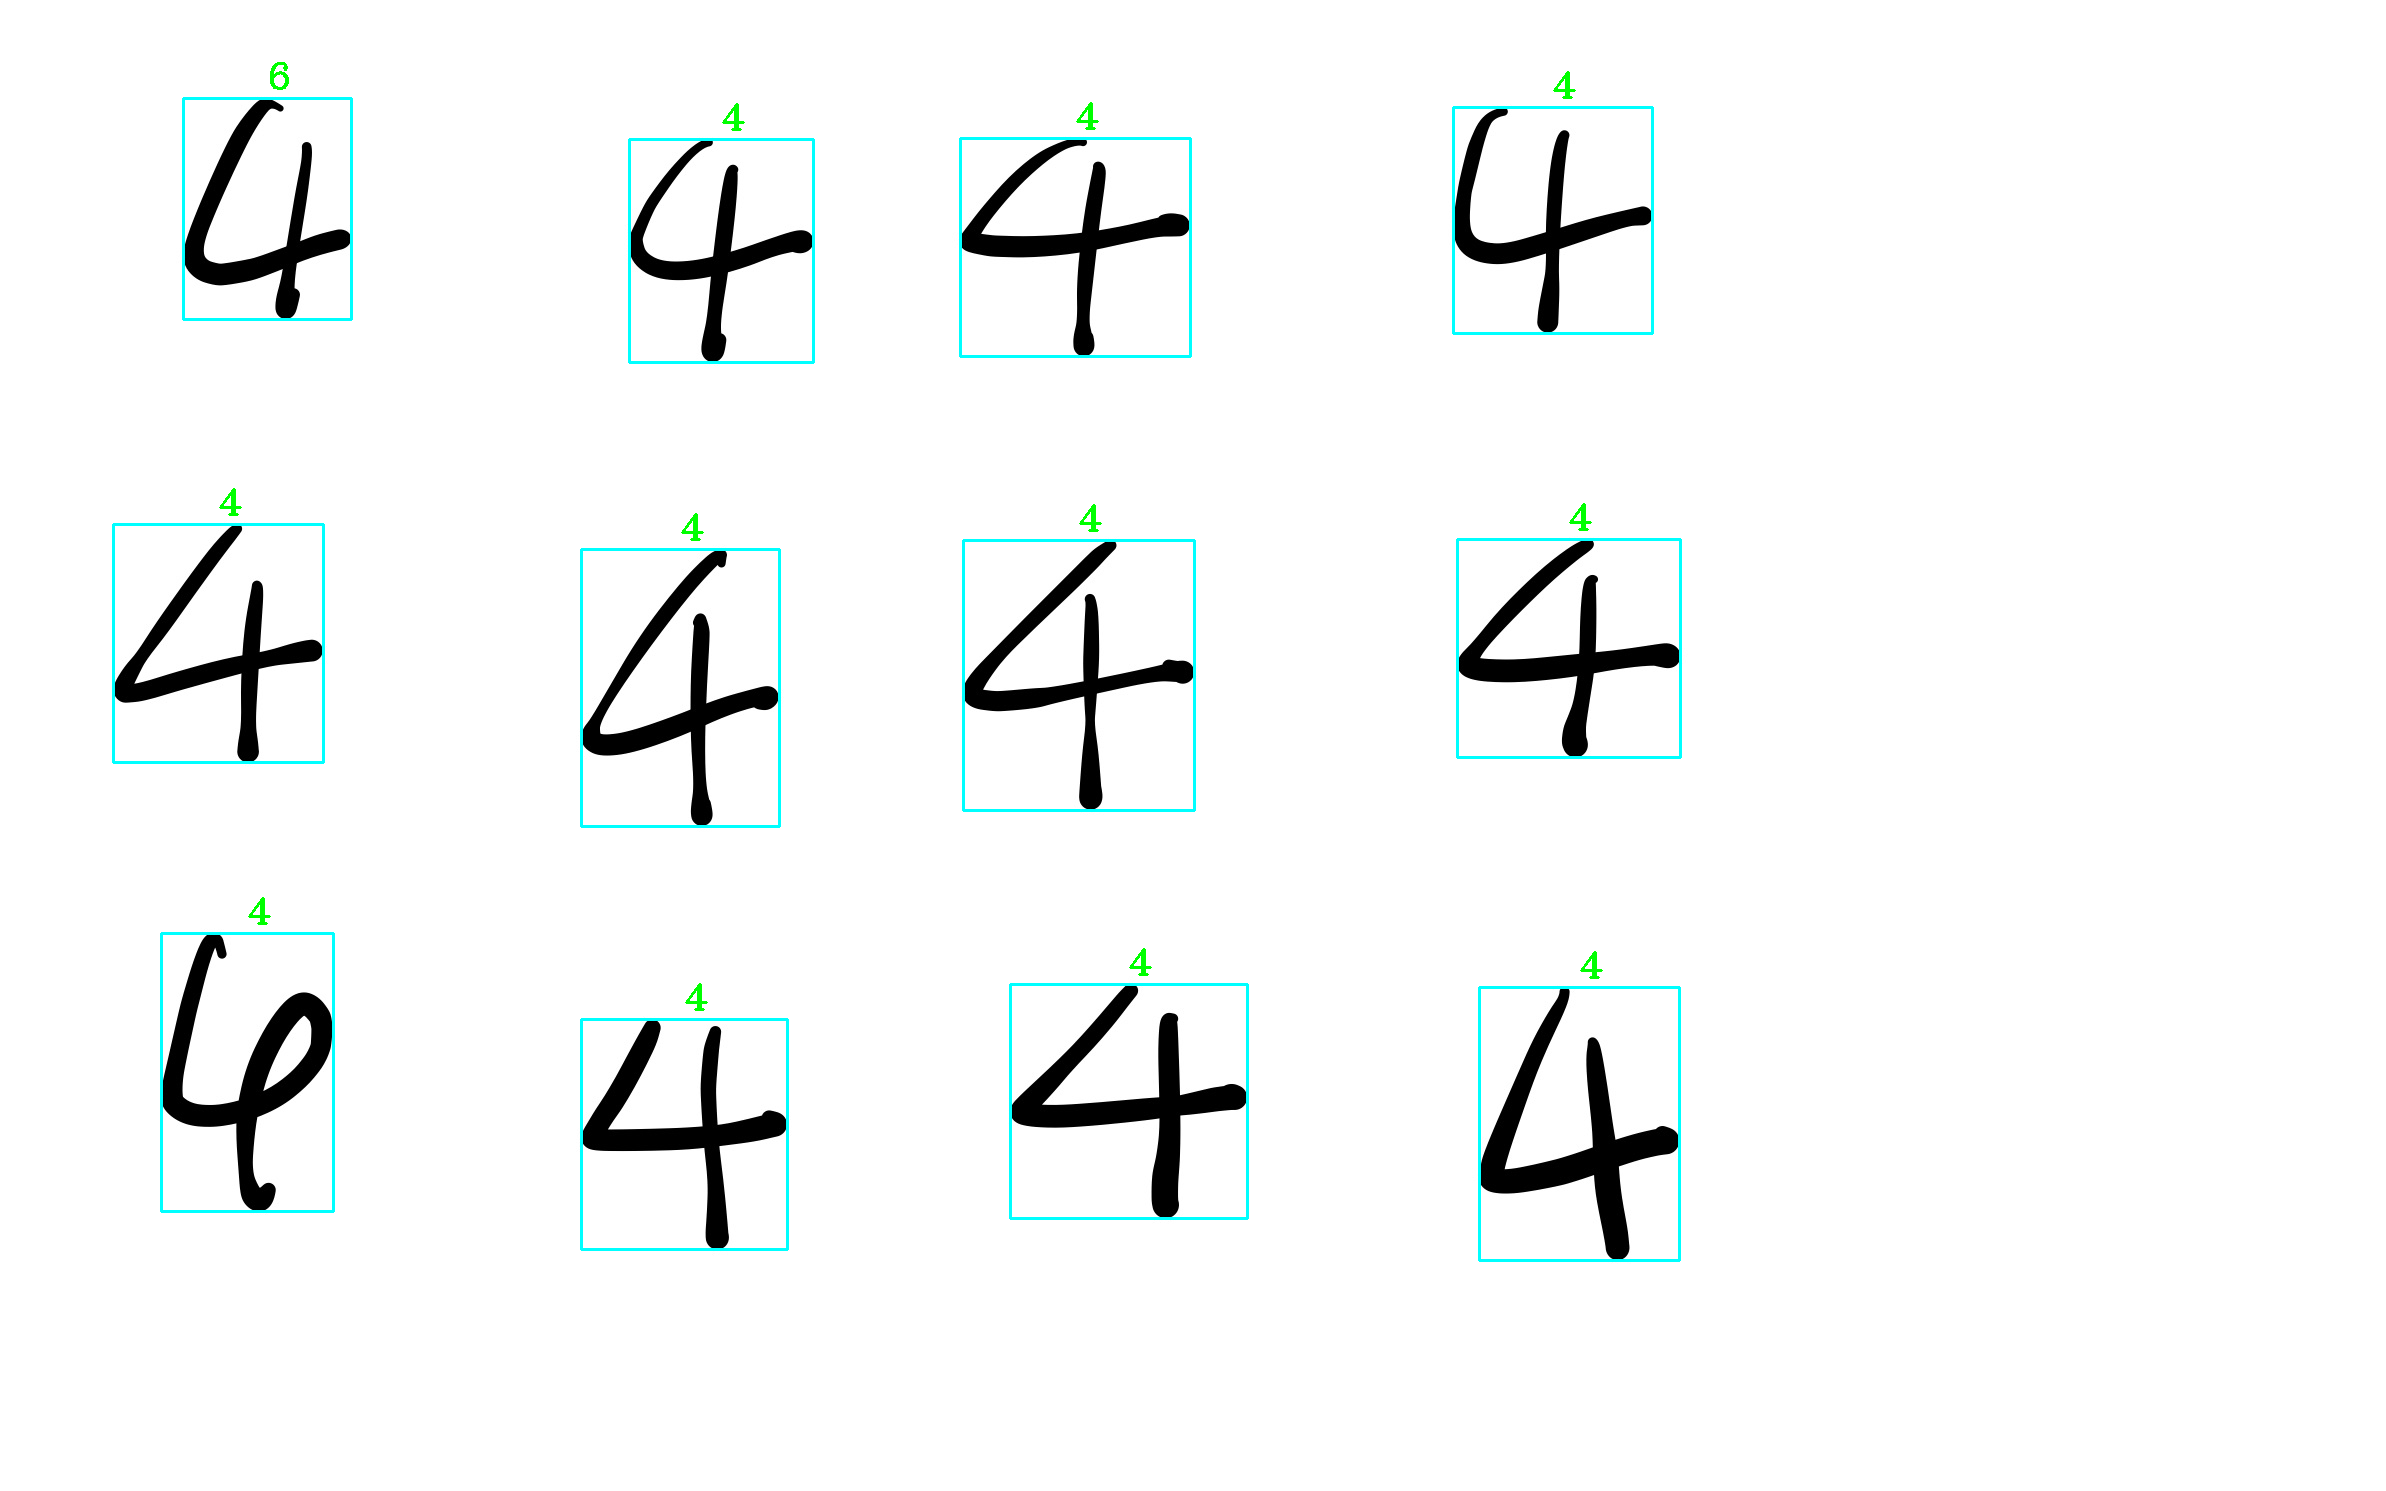

In [164]:
img_color = cv.imread('/content/4.jpg', cv.IMREAD_COLOR)
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

ret, img_binary = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

img_predict(img_binary, 4)
cv2_imshow(img_color)

In [155]:
from itertools import count
def img_predict(img, l):
  
  contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, 
                        cv.CHAIN_APPROX_SIMPLE)
  count = len(contours)
  correct_count = 0
  for contour in contours:
  
    x,y,w,h = cv.boundingRect(contour)
    length = max(w, h) + 60
    img_char = np.zeros((length, length, 1), np.uint8)

    new_x,new_y = x-(length - w)//2, y-(length - h)//2


    img_char = img[new_y:new_y+length, new_x:new_x+length]

    kernel = np.ones((5, 5), np.uint8)
    img_char = cv.morphologyEx(img_char, cv.MORPH_DILATE, kernel)

    #cv2_imshow(img_char)
    cv.waitKey(0)

    model = load_model('./model.h5')

    img_char = cv.resize(img_char, (28, 28), interpolation=cv.INTER_AREA)

    img_char = img_char / 255.0

    img_input = img_char.reshape(1,28, 28, 1)
    predictions = model.predict(img_input)
    i = np.argmax(predictions)
    #print(chr(char))
    labelNames = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
    label = y_list[i]
    if label == 10:
      label = '+'
    if label == 11:
      label = '-'
    if label == 12:
      label = '*'
    if label == 13:
      label = '/'
    if label == 14:
      label = '='
    if label == 15:
      label = '.'
    if label == 16:
      label = 'x'
    if label == 17:
      label = 'y'
    if label == 18:
      label = 'z'
    
    cv.rectangle(img_color, (x, y), (x+w, y+h), (255, 255, 0), 2)

    location = (x + int(w *0.5), y - 10)
    font = cv.FONT_HERSHEY_COMPLEX  
    fontScale = 1.2
    cv.putText(img_color, str(label), location, font, fontScale, (0,255,0), 2)
    if l == label:
      correct_count = correct_count+1
  print(correct_count/count*100.0)